In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def calc_inductance(coil, thin=0.0001):
    """Расчёт собственной индуктивности между двумя витками.
    :param coil: список с радиусом первой катушки
    :type coil: list
    :rtype: float
    :return: L, собственная индуктивность витка
    """
    mu0 = 1.26 * 10 ** (-6)
    L = mu0 * coil * (np.log(8 * coil / thin) - 7 / 4 + (thin ** 2) / (8 * coil ** 2) * (np.log(8 * coil / thin) + 1 / 3))
    return L

def calc_coupling_coefficient(coil_1, coil_2, d, po=0, fi=0):
    """Расчёт коэффициента связи между двумя витками.
    :param coil_1: список радиусов витков катушки индуктивности
    :type coil_1: list
    :param coil_2: список радиусов витков катушки индуктивности
    :type coil_2: list
    :param d: расстояние между витками
    :type d: float
    :rtype: float
    :return: L, собственная индуктивность между витками катушки
    """
    M = calc_mutual_inductance(coil_1, coil_2, d, po=po, fi=fi)
    L1 = calc_inductance(coil_1)
    L2 = calc_inductance(coil_2)
    k = M / (L1 * L2) ** 0.5
    return k

def plot(x, y, x_label=None, y_label=None, title=None, name_save_file=None, points=None):
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if points:
        for point in points:
            plt.scatter(*point)
    plt.plot(x, y)
    if name_save_file:
        plt.savefig(name_save_file)
    plt.grid()
    plt.show()
    
def calc_mutual_inductance(coil_1, coil_2, d, po=0, fi=0):
    """Расчёт взаимной индуктивности между двумя витками.
    :param coil_1: np.ndarray с радиусом одной катушки индуктивности, м
    :type coil_1: np.ndarray
    :param coil_2: список с радиусом одной катушки индуктивности, м
    :type coil_1: np.ndarray
    :param d: расстояние между витками, м
    :type d: np.ndarray or float, int
    :param po: латеральное смещение между витками, м
    :type po: np.ndarray or float, int
    :param fi: угловое смещение между витками
    :type fi: np.ndarray or float, int
    :rtype: np.ndarray
    :return: M, собственная индуктивность между витками
    """
    coil_1 = coil_1.T
    mu0 = 1.26 * 10 ** (-6)
    M = 0
    N = 180
    K = 180
    df1 = 2 * np.pi / N
    df2 = 2 * np.pi / K
    for n in range(N):
        for k in range(K):
            xk_xn = po + coil_1 * np.cos(df2 * k) * np.cos(fi) - coil_2 * np.cos(df1 * n)
            yk_yn = coil_1 * np.sin(df2 * k) * np.cos(fi) - coil_2 * np.sin(df1 * n)
            zk_zn = d + coil_1 * np.cos(df2 * k) * np.sin(fi)
            r12 = (xk_xn ** 2 + yk_yn ** 2 + zk_zn ** 2) ** 0.5
            M += (np.cos(df2 * k - df1 * n) * df1 * df2) / r12
    M *= mu0 * coil_1 * coil_2 / (4 * np.pi)
    return M

In [10]:
# конфигурация системы катушек в коде задана в м
# Размер радиуса витка №1 R1 = 2,8 см
coil_1 = np.array([[[0.028]]])
# Размер радиуса витка №2 R1 = [2,8;10] см
coil_2 = np.array([[np.linspace(start=0.02, stop=0.1, num=1000, endpoint=True)]])
# Осевое расстояние d = 0.5 см
d = 0.005

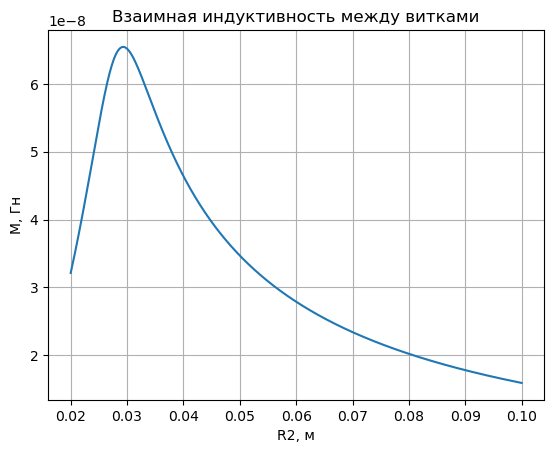

In [11]:
# расчёт взаимной индуктивности
m_r1r2 = calc_mutual_inductance(coil_1, coil_2, d)
# отображение графика
plot(coil_2[0][0], m_r1r2[0][0], x_label="R2, м", y_label="M, Гн", title="Взаимная индуктивность между витками")

In [25]:
# максимум Mmax
print(f"Mmax = {np.max(m_r1r2[0][0])} Гн при R = {coil_2[0][0][np.argmax(m_r1r2)]} м")

Mmax = 6.54393980021262e-08 Гн при R = 2.928928928928929 м


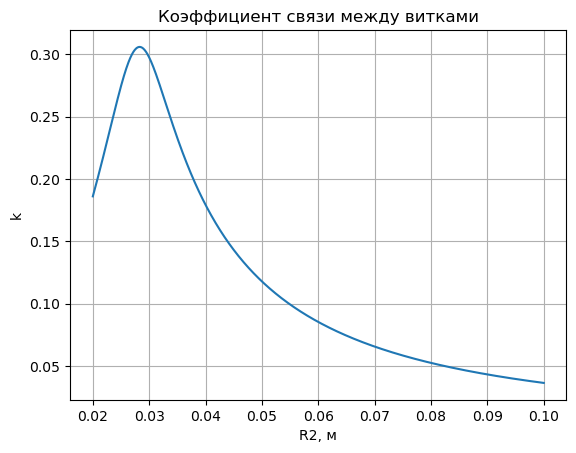

In [12]:
# расчёт коэффициента связи
k_r1r2 = calc_coupling_coefficient(coil_1, coil_2, d)
# отображение графика
plot(coil_2[0][0], k_r1r2[0][0], x_label="R2, м", y_label="k", title="Коэффициент связи между витками")

In [27]:
# максимум kmax
print(f"kmax = {np.max(k_r1r2[0][0])} при R = {coil_2[0][0][np.argmax(k_r1r2)] * 100} м")

kmax = 0.30593532109537463 при R = 2.832832832832833 м
